### Assignment 07

**You can use the local Jupyter environment if you are not comfortable with Colab for this assignment.**

The first half of this assignment is a repeat of assignment 05.

This gives you a chance to refresh.

The second half is new and gives you a chance to perform additional practices.

You also get a chance to use some of the Python libraries and techniques.

You will unzip the zip file manually in preparation for this assignment.

The link to the zip file is (you have already used it in your assignment 5):

https://ed-public-download.app.cloud.gov/downloads/CollegeScorecard_Raw_Data.zip

After unzipping, You will have all files in one folder named "CollegeScorecard_Raw_Data" 

The folder contains the yearly data files from 1996 to 2019 school years.

if you are using your local environment, I suggest you create a new folder call "Assignment7" and place the Notebook file and the data folder under it.
```
Assignment7/
    - assignment_07.ipynb
    - CollegeScorecard_Raw_Data/
        - ...
        - 'MERGED1996_97_PP.csv',
        - 'MERGED2015_16_PP.csv',
        - ...
        - 'MERGED2017_18_PP.csv'
```


In [2]:
# <1> 
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import os
import re

In [5]:
# <2> 
# Display the current workin directory using os.getcwd()
# you would need to import a standard Python library called os which stands for operating system,
# so place that import statement in the previous cell.
# Since your notebook and your data files are not in # the same folder, 
# you want to make sure what is the current working folder and 
# how to access a data file in a different folder

current_path = os.getcwd()

current_path

'C:\\Users\\shail\\Downloads'

In [16]:
# <3> 
# os library has a method call listdir which generates a list of files in a directory/folder.
# use this method to assign the contents (list of file names) of the data folder to a variable and display it.
# # You can use ../ construct to traverse to the parent folder and then to another foloder parallel to the current folder

dir_list = os.listdir("CollegeScorecard_Raw_Data/")
dir_list

['.DS_Store',
 'Crosswalks.zip',
 'data.yaml',
 'FieldOfStudyData1415_1516_PP.csv',
 'FieldOfStudyData1516_1617_PP.csv',
 'MERGED1996_97_PP.csv',
 'MERGED1997_98_PP.csv',
 'MERGED1998_99_PP.csv',
 'MERGED1999_00_PP.csv',
 'MERGED2000_01_PP.csv',
 'MERGED2001_02_PP.csv',
 'MERGED2002_03_PP.csv',
 'MERGED2003_04_PP.csv',
 'MERGED2004_05_PP.csv',
 'MERGED2005_06_PP.csv',
 'MERGED2006_07_PP.csv',
 'MERGED2007_08_PP.csv',
 'MERGED2008_09_PP.csv',
 'MERGED2009_10_PP.csv',
 'MERGED2010_11_PP.csv',
 'MERGED2011_12_PP.csv',
 'MERGED2012_13_PP.csv',
 'MERGED2013_14_PP.csv',
 'MERGED2014_15_PP.csv',
 'MERGED2015_16_PP.csv',
 'MERGED2016_17_PP.csv',
 'MERGED2017_18_PP.csv',
 'MERGED2018_19_PP.csv']

In [17]:
# <4> 
# The folder contains files that are not the yearly data files
# write code to remove the unwanted files from the list vsriable 
# Note: don't remove/delete these files from the folder in your drive
# For example, use the file extension to only keep the csv files 
# or use the name patter - data file name begins with "MERGED"
# You can use the concept of list comprehension to write just 
# one line of code as well as using a for loop, your choice.

name = "MERGED"

k = [filename for filename in dir_list if filename.startswith(name)]

dir_list = k      

dir_list

['MERGED1996_97_PP.csv',
 'MERGED1997_98_PP.csv',
 'MERGED1998_99_PP.csv',
 'MERGED1999_00_PP.csv',
 'MERGED2000_01_PP.csv',
 'MERGED2001_02_PP.csv',
 'MERGED2002_03_PP.csv',
 'MERGED2003_04_PP.csv',
 'MERGED2004_05_PP.csv',
 'MERGED2005_06_PP.csv',
 'MERGED2006_07_PP.csv',
 'MERGED2007_08_PP.csv',
 'MERGED2008_09_PP.csv',
 'MERGED2009_10_PP.csv',
 'MERGED2010_11_PP.csv',
 'MERGED2011_12_PP.csv',
 'MERGED2012_13_PP.csv',
 'MERGED2013_14_PP.csv',
 'MERGED2014_15_PP.csv',
 'MERGED2015_16_PP.csv',
 'MERGED2016_17_PP.csv',
 'MERGED2017_18_PP.csv',
 'MERGED2018_19_PP.csv']

In [19]:
# <5> 
# Now that you have a clean list of the yearly files, you want to loop through them
# and read them into a dataframe one at a time. You only load six columns: 
# ["UNITID", "INSTNM", "STABBR", "REGION", "ADM_RATE", "TUITIONFEE_IN"].
# You should use "usecols" option of Pandas to avoid reading unwanted columns.
# You also want to add a new column call "YEAR" to differentiate the data frames from each other.
# The YEAR variable should be yyyy format so tht you can convert them into integer.
# if you use the format yyyy-yy (such as 1997-98 school year), you will not be able to convert them directly to integer
# if you use scatter plot, the YEAR needs to be converted to integer or float. 
# 
# You would use an empty list and append the yearly dataframes to the list.
# After all data files are loaded and appended to the list, you would use Pandas to concatenate them into a 
# new single data frame.
# Note: this exercise incorporates many techques we learned before
# - list (creating an empty, append an item to the list)
# - for loop 
# - read only the needed columns from a file (using usecols option)
# - add a new column to a data frame
# - concatenate multiple dataframes into a single one
# This exercise may appear a big challenging but it worths the effort. You will learn a lot and  love it. I promise.

df_list = []

for file in dir_list:
    df_t= pd.read_csv(current_path+'//CollegeScorecard_Raw_Data//'+file,usecols=["UNITID", "INSTNM", "STABBR", "REGION", "ADM_RATE", "TUITIONFEE_IN"]) 
    df_t['YEAR'] = file[6:10]
    df_list.append(df_t)
    
df = pd.concat(df_list, axis=0, ignore_index=True)

In [20]:
df_list

[      UNITID                                           INSTNM STABBR  REGION  \
 0     100636               Community College of the Air Force     AL       0   
 1     100654                         Alabama A & M University     AL       5   
 2     100663              University of Alabama at Birmingham     AL       5   
 3     100672           ALABAMA AVIATION AND TECHNICAL COLLEGE     AL       5   
 4     100690                               Amridge University     AL       5   
 ...      ...                                              ...    ...     ...   
 7002  428347  American Institute of Medical-Dental Technology     UT       7   
 7003  428365          INSTITUTO DE ESTETICA Y BELLAZA MARUGIE     PR       9   
 7004  428374                           KEISER COLLEGE-DAYTONA     FL       5   
 7005  428392                        Klamath Community College     OR       8   
 7006  428444                     The Art Institute of Phoenix     AZ       6   
 
       ADM_RATE  TUITIONFE

In [21]:
df

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
0,100636,Community College of the Air Force,AL,0.0,NaN,NaN,1996
1,100654,Alabama A & M University,AL,5.0,NaN,NaN,1996
2,100663,University of Alabama at Birmingham,AL,5.0,NaN,NaN,1996
3,100672,ALABAMA AVIATION AND TECHNICAL COLLEGE,AL,5.0,NaN,NaN,1996
4,100690,Amridge University,AL,5.0,NaN,NaN,1996
...,...,...,...,...,...,...,...
163326,48511112,Georgia Military College - Dublin,GA,5.0,NaN,6120.0,2018
163327,48511113,Georgia Military College - Eastman,GA,5.0,NaN,6120.0,2018
163328,48616901,American College of Barbering - Florence,KY,5.0,NaN,NaN,2018
163329,49005401,HCI College - Fort Lauderdale Campus,FL,5.0,NaN,21420.0,2018


In [22]:
# <6> 
# explore the new dataframe (# of observations, varibles, head, tail, sample, missing values, statistics,etc.)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163331 entries, 0 to 163330
Data columns (total 7 columns):
UNITID           163331 non-null int64
INSTNM           163331 non-null object
STABBR           163331 non-null object
REGION           163330 non-null float64
ADM_RATE         44911 non-null float64
TUITIONFEE_IN    79194 non-null float64
YEAR             163331 non-null object
dtypes: float64(3), int64(1), object(3)
memory usage: 8.7+ MB


In [23]:
df.head(5)

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
0,100636,Community College of the Air Force,AL,0.0,NaN,NaN,1996
1,100654,Alabama A & M University,AL,5.0,NaN,NaN,1996
2,100663,University of Alabama at Birmingham,AL,5.0,NaN,NaN,1996
3,100672,ALABAMA AVIATION AND TECHNICAL COLLEGE,AL,5.0,NaN,NaN,1996
4,100690,Amridge University,AL,5.0,NaN,NaN,1996


In [24]:
df.tail(5)

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
163326,48511112,Georgia Military College - Dublin,GA,5.0,NaN,6120.0,2018
163327,48511113,Georgia Military College - Eastman,GA,5.0,NaN,6120.0,2018
163328,48616901,American College of Barbering - Florence,KY,5.0,NaN,NaN,2018
163329,49005401,HCI College - Fort Lauderdale Campus,FL,5.0,NaN,21420.0,2018
163330,49146401,ABC Adult School - Cabrillo Lane,CA,8.0,NaN,NaN,2018


null values 

In [25]:
df.isna().sum() 

UNITID                0
INSTNM                0
STABBR                0
REGION                1
ADM_RATE         118420
TUITIONFEE_IN     84137
YEAR                  0
dtype: int64

In [26]:
# <7>
# the dataframe contains many years of data of all U.S. colleges.
# let's just look at UMBC
# filter/query the dataframe to retrieve only rows that belong to UMBC
# save the UMNC data to a new data frame. using a new variable 
# so that the old big data frame is still available for later use.

UMBC = df.loc[df["INSTNM"]=="University of Maryland-Baltimore County"]
UMBC = UMBC.reset_index().drop(columns=['index'])
UMBC

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
0,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1996
1,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1997
2,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1998
3,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1999
4,163268,University of Maryland-Baltimore County,MD,2.0,NaN,5490.0,2000
5,163268,University of Maryland-Baltimore County,MD,2.0,0.6551,5910.0,2001
6,163268,University of Maryland-Baltimore County,MD,2.0,0.6327,6362.0,2002
7,163268,University of Maryland-Baltimore County,MD,2.0,0.5757,7388.0,2003
8,163268,University of Maryland-Baltimore County,MD,2.0,0.7014,8020.0,2004
9,163268,University of Maryland-Baltimore County,MD,2.0,0.7143,8520.0,2005


In [27]:
# <8>
# Explore this UMBC dataframe (# of observations, varibles, head, tail, sample, missing values, statistics,etc.)

UMBC.describe()

,UNITID,REGION,ADM_RATE,TUITIONFEE_IN
count,23.0,23.0,18.000000,19.000000
mean,163268.0,2.0,0.640694,9004.842105
std,0.0,0.0,0.052728,1825.795421
min,163268.0,2.0,0.568300,5490.000000
25%,163268.0,2.0,0.597600,8270.000000
50%,163268.0,2.0,0.632100,8872.000000
75%,163268.0,2.0,0.689375,10226.000000
max,163268.0,2.0,0.717400,11778.000000


In [28]:
UMBC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 7 columns):
UNITID           23 non-null int64
INSTNM           23 non-null object
STABBR           23 non-null object
REGION           23 non-null float64
ADM_RATE         18 non-null float64
TUITIONFEE_IN    19 non-null float64
YEAR             23 non-null object
dtypes: float64(3), int64(1), object(3)
memory usage: 1.4+ KB


In [29]:
UMBC.isna().sum()

UNITID           0
INSTNM           0
STABBR           0
REGION           0
ADM_RATE         5
TUITIONFEE_IN    4
YEAR             0
dtype: int64

In [30]:
UMBC.head()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
0,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1996
1,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1997
2,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1998
3,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1999
4,163268,University of Maryland-Baltimore County,MD,2.0,NaN,5490.0,2000


In [31]:
UMBC.tail()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
18,163268,University of Maryland-Baltimore County,MD,2.0,0.5961,10384.0,2014
19,163268,University of Maryland-Baltimore County,MD,2.0,0.5942,11006.0,2015
20,163268,University of Maryland-Baltimore County,MD,2.0,0.5683,11264.0,2016
21,163268,University of Maryland-Baltimore County,MD,2.0,0.6021,11518.0,2017
22,163268,University of Maryland-Baltimore County,MD,2.0,0.5794,11778.0,2018


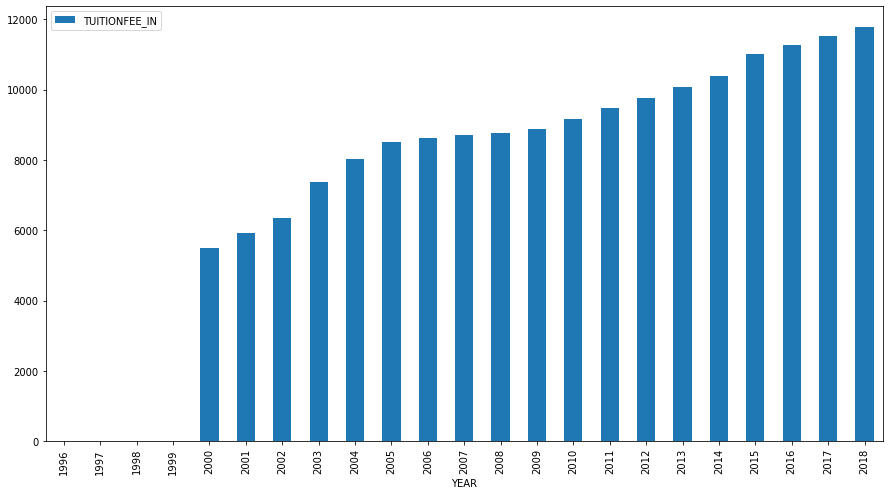

In [32]:
# <9> 
# Plot UMBC's in-state tution overtime from 1996 to 2019 using Bar Chart

UMBC[['TUITIONFEE_IN','YEAR']].set_index('YEAR').plot(kind='bar',figsize=(15,8))

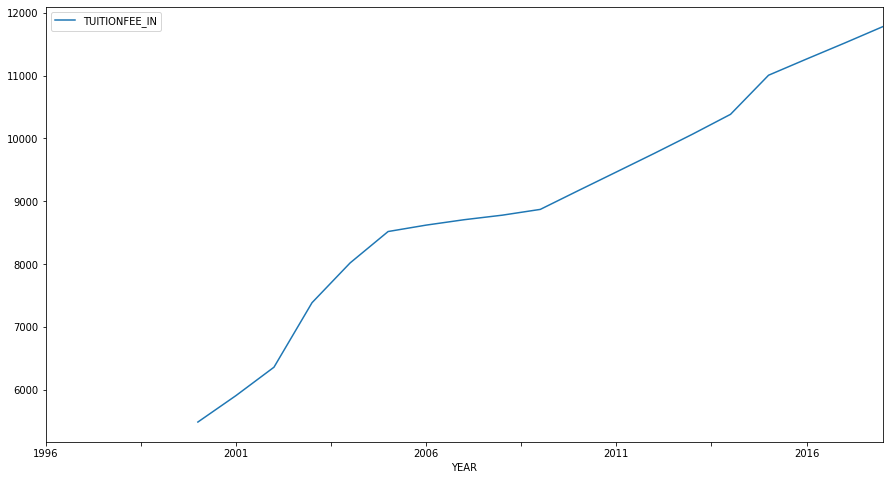

In [33]:
# <10> 
# Plot UMBC's in-state tution overtime from 1996 to 2019 using Line Chart

UMBC[['TUITIONFEE_IN','YEAR']].set_index('YEAR').plot(figsize=(15,8))

In [34]:
# <11>
# Now let's look at the tuition growth rate year over year
# We need to calculate UMBC tuition change percentage each year
# First convert the TUITIONFEE_IN column to a Python List
tn_list=UMBC['TUITIONFEE_IN'].to_list()

In [35]:
# Loop through the list and calculate the % change each year over the prior year
# This takes some effort. Not hard, just some abstract/logical thinking and some experiments
# Have fun on this one
# The resulting number has many decimal points which are unnecessary and not visually appealing.
# Round up the percentage to two decimal points
# You can use for loop. Or better, use list comprehension for simplicity/brevity
# Add the list of the percentages to the dataframe as a new column ("PCT_CHANGE")
# Not as hard as you may think. If you get stuck, you think too hard. 
# Google it and you will find the answer.

PCT_CHANGE=[]

for i in tn_list:PCT_CHANGE.append(0)
    
for i in range(len(UMBC)):
    if isinstance(tn_list[i], (float))&isinstance(tn_list[i-1], (float)):
        pc = ((tn_list[i]-(tn_list[i-1]))/(tn_list[i-1]))*100    
        PCT_CHANGE[i]=round(pc,2)
    else:
        pass
    
UMBC['PCT_CHANGE']=PCT_CHANGE

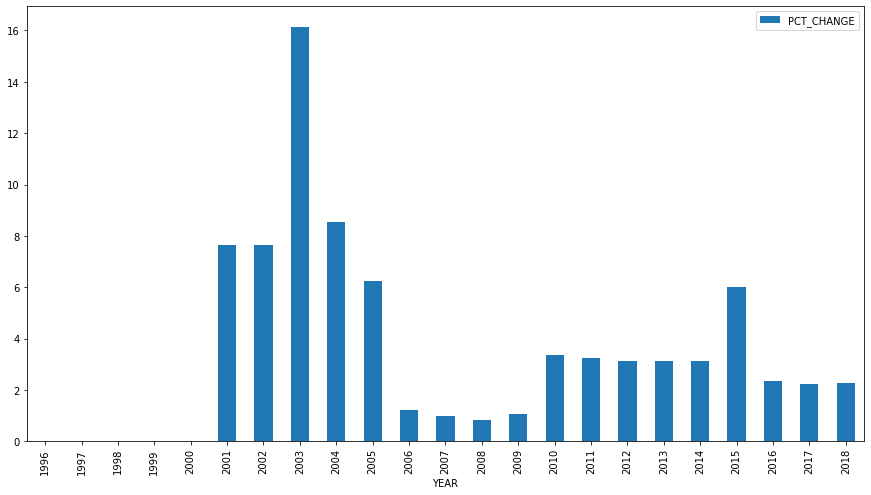

In [36]:
# Finaly, we can make the plot tuition growth rate year over year - bar first, then line chart
UMBC[['PCT_CHANGE','YEAR']].set_index('YEAR').plot(kind='bar',figsize=(15,8))

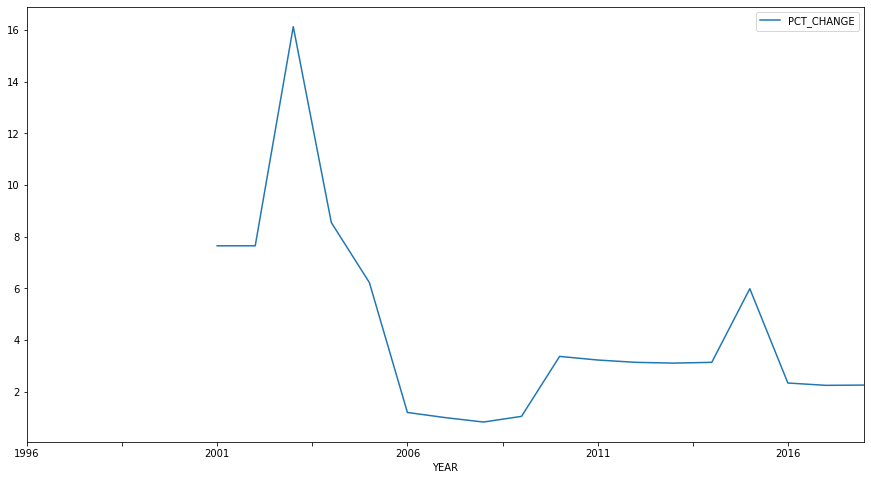

In [37]:
UMBC[['PCT_CHANGE','YEAR']].set_index('YEAR').plot(figsize=(15,8))

In [38]:
# <12>
# Since we want to do the same calculation for JHU. 
# Instead of doing it piecemeal as we did for UMBC
# Let's create a function which can be reused for any college.
# This function takes a list of tuitions and return a list of percentage changes year over year
# This function can be used later 

def tuition_pct_change(tn_fee=[]):
    PC_CHANGE=[]
    for i in tn_fee:PC_CHANGE.append(0)
    
    for i in range(len(tn_fee)):
        if isinstance(tn_fee[i], (float))&isinstance(tn_fee[i-1], (float)):
            z = ((tn_fee[i]-(tn_fee[i-1]))/(tn_fee[i-1]))*100    
            PC_CHANGE[i]=round(z,2)
        else:
            pass
    PC_CHANGE
    return PC_CHANGE

In [39]:
# <13>
# the dataframe contains many years of data of all U.S. colleges.
# let's just look at JHU
# filter/query the dataframe to retrieve only rows that belong to JHU
# save the JHU data to a new data frame. using a new variable 
# so that the old big data frame is still available for later use.

JHU = df.loc[df["INSTNM"]=="Johns Hopkins University"]

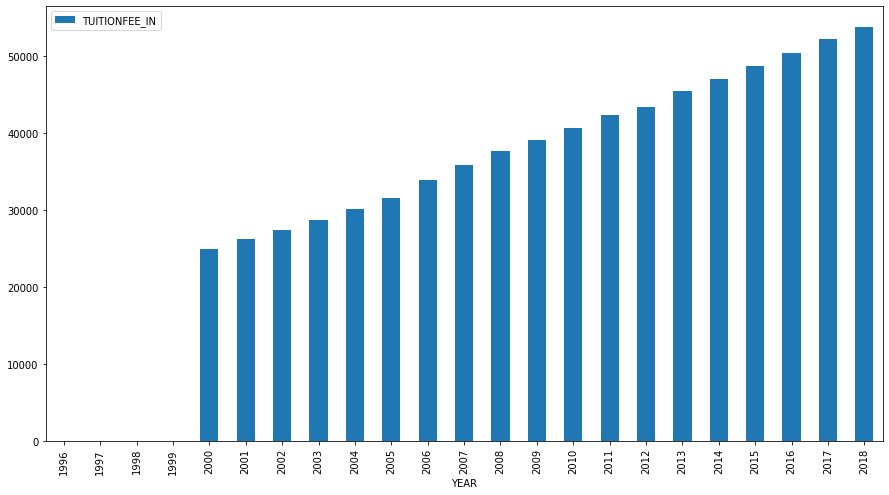

In [40]:
# <14> 
# Plot JHU's in-state tuition overtime from 1996 to 2019. 
# Let's plot bar and line chart together


JHU[['TUITIONFEE_IN','YEAR']].set_index('YEAR').plot(kind='bar',figsize=(15,8))

In [41]:
# <15>
# Let's calculate the JHU tuition percentge growth using the function defined earlier

jt_list=JHU['TUITIONFEE_IN'].to_list()

jhu_pct_change = tuition_pct_change(jt_list)

jhu_pct_change

[nan,
 nan,
 nan,
 nan,
 nan,
 5.13,
 4.5,
 4.89,
 4.91,
 4.91,
 7.21,
 5.9,
 5.01,
 3.85,
 3.91,
 3.93,
 2.63,
 4.79,
 3.5,
 3.51,
 3.49,
 3.49,
 3.01]

In [42]:
# <16>
# Add the list of percentage changes to the dataframe as a new column ("PCT_CHANGE")

JHU['PCT_CHANGE'] = jhu_pct_change

C:\Users\shail\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


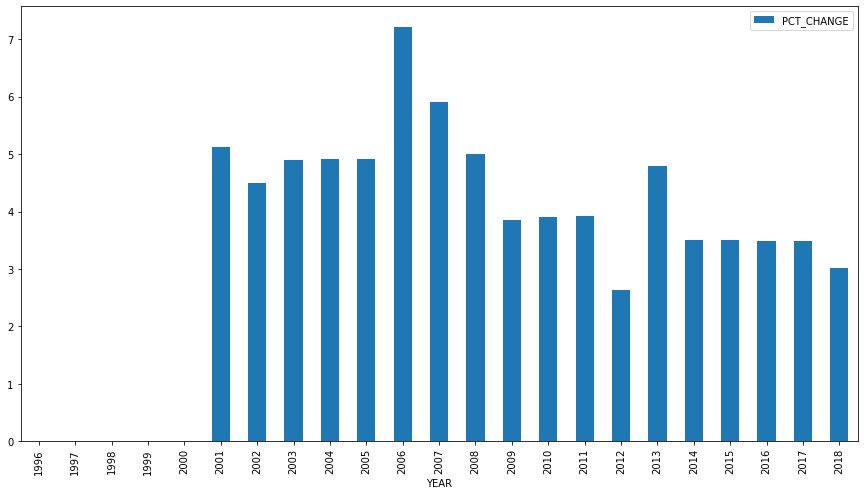

In [43]:
# <17> Make a bar plot of the JHU percentage changes tuitions over time

JHU[['PCT_CHANGE','YEAR']].set_index('YEAR').plot(kind='bar',figsize=(15,8))

In [44]:
# <18>
# In order to plot both UMBC and JHU tuition change over time in the same plot,
# we need to combine the two datasets using the common key of YEAR 
# First make a umbc2 dataframe with only two columns needed. WE don't need other columns.
# Also change the column name from "PCT_CHANGE" to "UMBC_PCT" in preparation for the merge.
# This is because both umbc and jhu dataframe have the same column name "PCT_CHANGE",
# We rename them to there is no collision during the merge. BTW, Pandas handles collision gracefully,
# Feel free to try it without changing the column names.

UMBC_2 = UMBC[['PCT_CHANGE','YEAR']]
UMBC_2 = UMBC_2.rename(columns={"PCT_CHANGE": "UMBC_PCT"})

In [45]:
# Then make a jhu2 dataframe with only two columns needed. WE don't need other columns.
# Also change the column name from "PCT_CHANGE" to "JHU_PCT"  in preparation for the merge

JHU_2 = JHU[['PCT_CHANGE','YEAR']]
JHU_2 = JHU_2.rename(columns={"PCT_CHANGE": "JHU_PCT"})

In [46]:
# Now, merger the two data frames
# and display the new dataframe
UMBC_JHU = pd.merge(UMBC_2, JHU_2)

In [47]:
# Plot UMBC and JHU separately on the same plot 
# However, this does not work since the bars overlap. 

- It actually worked for me, I am not sure if I made anything wrong

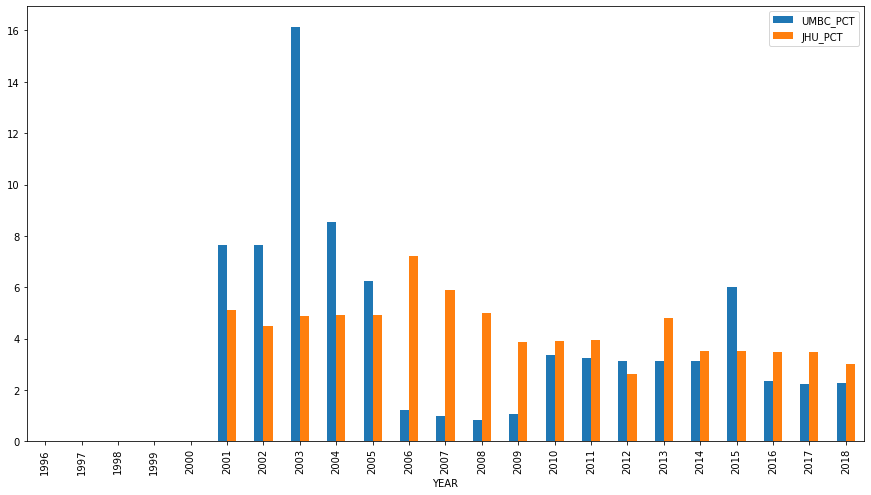

In [48]:
# Plot them together using y=["UMBC_PCT","JHU_PCT"] option of bar plot

UMBC_JHU.set_index('YEAR').plot(kind="bar",figsize=(15,8))

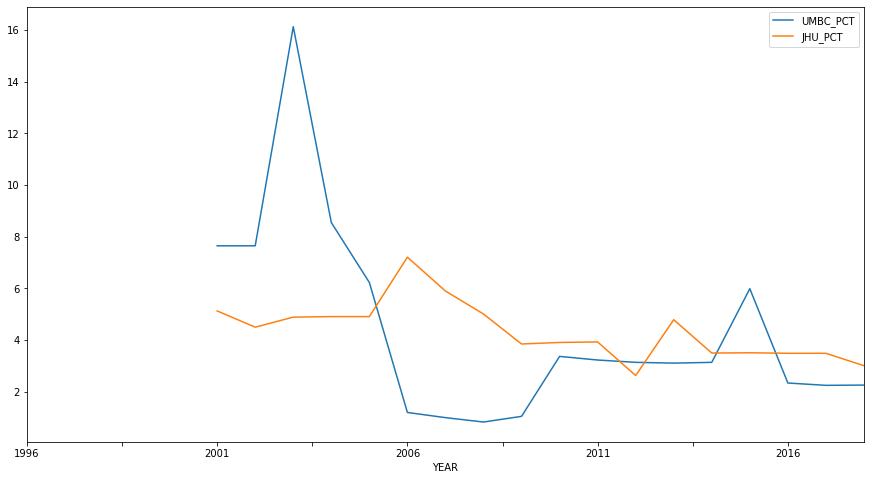

In [49]:
# Plot them together using y=["UMBC_PCT","JHU_PCT"] option of line plot

UMBC_JHU.set_index('YEAR').plot(figsize=(15,8))

In [50]:
# <19> 
# document your observation/conclusion of the comparison plots (bar/line)
# use the following Markdown cell

## Observation :
### The percentage of fee change is highest in the year 2003 in case of UMBC and 2006 for JHU. In the year From the year 2003 to 2008 the percentage change in fee decresed steadily in case of UMBC. There is no much change in the fees of JHU from years 2001 to 2018 compared to that of UMBC where there are many fluctuations.


In [52]:
# The end.